# SUPPORT VECTOR MACHINES

SVM aplicado ao sistema de classificação, embora seja um algoritmo potente em problemas de regressão.

Visando separar classes por uma linha reta, ou classes linearmente separáveis.

Dataset = Iris Flowers


In [21]:

import pandas as pd
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import svm

In [3]:
#Transformando os dados em um DataFrame
iris = load_iris()
df_iris = pd.DataFrame(data=iris.data, columns= iris.feature_names)
df_iris['label'] = iris.target
df_iris['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [4]:
df_iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'label', 'species'],
      dtype='object')

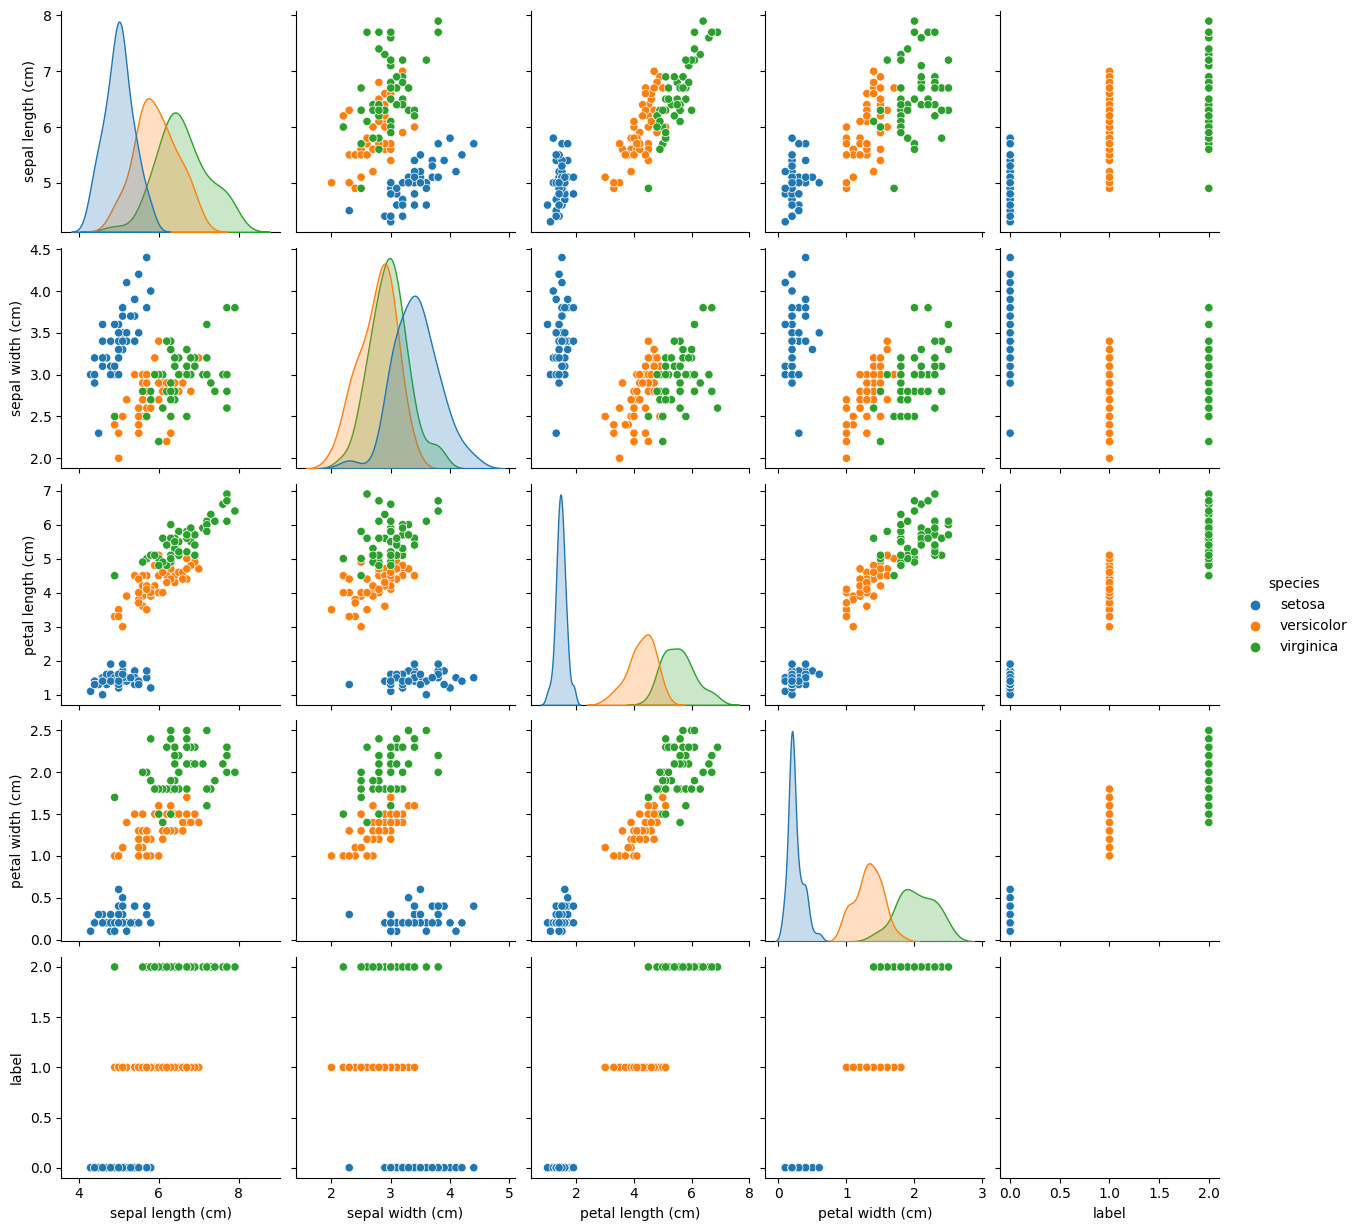

In [18]:
#Plotagem em pares
#Para observar se elas são linearmente separáveis
sns.pairplot(data=df_iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'label', 'species']], hue='species', palette=None)

In [22]:
#Variáveis
X = iris.data
y = iris.target

#Separando os dados de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=35)

In [29]:
# C é a margem é suave ou rígida
# #C por default é 1.0 quanto maior mais rígido
clf = svm.SVC(C=1.0)

#fit é para treinar o modelo
clf.fit(X_train, y_train)

SVC()

In [37]:
#Predição do conjunto de teste
y_predict = clf.predict(X_test)
print(y_predict)

[1 1 2 1 0 2 2 1 1 0 1 2 0 2 0 2 1 0 0 0 1 1 2 1 0 0 0 2 0 2 0 2 1 0 1 2 0
 2 2 1 1 0 0]


In [38]:
print(y_test)

[1 1 2 1 0 2 2 1 1 0 1 2 0 2 0 2 1 0 0 0 1 1 2 1 0 0 0 2 0 2 0 1 2 0 1 2 0
 2 2 2 1 0 0]


In [33]:
#Acurária em %
clf.score(X_test, y_test)

0.9302325581395349

## Métricas de avaliação de um Classificador

1. Acurácia
2. Matriz de Confusão(verdadeiro positivos, verdadeiro negativo, falso positivo, falso negativo)

    - Precisão (diminuir os falsos positivos, exemplo: algoritmo para mostrar vídeos para crianças)
    - Revogação (diminuir os falsos negeativos, exemplo: algoritmo que estima possibilidade de doenças graves)

3. Pontuação F1

**Documentação scikit-learn:**

Classification metrics section

metrics.nome_da_classificação


In [28]:
from sklearn.metrics import classification_report

In [35]:
classif_report = classification_report(y_true=y_test, y_pred=y_predict, target_names=iris.target_names )
print(classif_report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.86      0.89        14

    accuracy                           0.93        43
   macro avg       0.93      0.93      0.93        43
weighted avg       0.93      0.93      0.93        43

